In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
tf.random.set_seed(3)
import glob 
import skimage as oi
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU


In [28]:
folders_names = []
##'/kaggle/input/leapgestrecog/leapGestRecog/0'
for i in range(10):
    folder = r'E:\Prodigy infotech\Hand_gestures\leapGestRecog\0{}'.format(i)
    folders_names.append(folder)

files_names = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb']

In [29]:
training_data = []

def create_training_data():
    for folder in folders_names:
        Class_num=folder[-1]
        print('Class ' ,Class_num)
        for file in files_names:
            path = os.path.join(folder, file)

            print('Class ' ,Class_num,file)
#             c=0
            
            for img in tqdm(os.listdir(path)):
#                 if(c==100):
#                     break
#                 c+=1
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
          
                training_data.append([img_array,int(Class_num)])
                        
    
create_training_data()

Class  0
Class  0 01_palm


100%|██████████| 200/200 [00:02<00:00, 90.25it/s] 


Class  0 02_l


100%|██████████| 200/200 [00:01<00:00, 137.97it/s]


Class  0 03_fist


100%|██████████| 200/200 [00:01<00:00, 142.18it/s]


Class  0 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 124.33it/s]


Class  0 05_thumb


100%|██████████| 200/200 [00:01<00:00, 117.19it/s]


Class  1
Class  1 01_palm


100%|██████████| 200/200 [00:01<00:00, 129.10it/s]


Class  1 02_l


100%|██████████| 200/200 [00:01<00:00, 128.53it/s]


Class  1 03_fist


100%|██████████| 200/200 [00:01<00:00, 128.01it/s]


Class  1 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 120.79it/s]


Class  1 05_thumb


100%|██████████| 200/200 [00:01<00:00, 105.04it/s]


Class  2
Class  2 01_palm


100%|██████████| 200/200 [00:01<00:00, 107.62it/s]


Class  2 02_l


100%|██████████| 200/200 [00:01<00:00, 124.20it/s]


Class  2 03_fist


100%|██████████| 200/200 [00:01<00:00, 135.60it/s]


Class  2 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 114.90it/s]


Class  2 05_thumb


100%|██████████| 200/200 [00:01<00:00, 115.95it/s]


Class  3
Class  3 01_palm


100%|██████████| 200/200 [00:01<00:00, 114.24it/s]


Class  3 02_l


100%|██████████| 200/200 [00:01<00:00, 123.39it/s]


Class  3 03_fist


100%|██████████| 200/200 [00:01<00:00, 126.06it/s]


Class  3 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 122.70it/s]


Class  3 05_thumb


100%|██████████| 200/200 [00:01<00:00, 113.01it/s]


Class  4
Class  4 01_palm


100%|██████████| 200/200 [00:01<00:00, 110.81it/s]


Class  4 02_l


100%|██████████| 200/200 [00:01<00:00, 117.03it/s]


Class  4 03_fist


100%|██████████| 200/200 [00:01<00:00, 106.37it/s]


Class  4 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 125.75it/s]


Class  4 05_thumb


100%|██████████| 200/200 [00:01<00:00, 119.06it/s]


Class  5
Class  5 01_palm


100%|██████████| 200/200 [00:01<00:00, 114.00it/s]


Class  5 02_l


100%|██████████| 200/200 [00:01<00:00, 112.86it/s]


Class  5 03_fist


100%|██████████| 200/200 [00:01<00:00, 119.72it/s]


Class  5 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 110.11it/s]


Class  5 05_thumb


100%|██████████| 200/200 [00:01<00:00, 114.25it/s]


Class  6
Class  6 01_palm


100%|██████████| 200/200 [00:01<00:00, 118.86it/s]


Class  6 02_l


100%|██████████| 200/200 [00:01<00:00, 124.00it/s]


Class  6 03_fist


100%|██████████| 200/200 [00:01<00:00, 118.66it/s]


Class  6 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 125.84it/s]


Class  6 05_thumb


100%|██████████| 200/200 [00:01<00:00, 119.91it/s]


Class  7
Class  7 01_palm


100%|██████████| 200/200 [00:01<00:00, 119.39it/s]


Class  7 02_l


100%|██████████| 200/200 [00:01<00:00, 108.05it/s]


Class  7 03_fist


100%|██████████| 200/200 [00:01<00:00, 120.83it/s]


Class  7 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 125.85it/s]


Class  7 05_thumb


100%|██████████| 200/200 [00:01<00:00, 120.61it/s]


Class  8
Class  8 01_palm


100%|██████████| 200/200 [00:01<00:00, 100.49it/s]


Class  8 02_l


100%|██████████| 200/200 [00:01<00:00, 109.69it/s]


Class  8 03_fist


100%|██████████| 200/200 [00:01<00:00, 110.64it/s]


Class  8 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 108.97it/s]


Class  8 05_thumb


100%|██████████| 200/200 [00:01<00:00, 123.99it/s]


Class  9
Class  9 01_palm


100%|██████████| 200/200 [00:01<00:00, 105.52it/s]


Class  9 02_l


100%|██████████| 200/200 [00:01<00:00, 110.23it/s]


Class  9 03_fist


100%|██████████| 200/200 [00:01<00:00, 116.97it/s]


Class  9 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 114.42it/s]


Class  9 05_thumb


100%|██████████| 200/200 [00:01<00:00, 108.70it/s]


In [30]:
for folder in folders_names:
    class_num = folder[-1]
    print('Class', class_num)
    for file in files_names:
        path = os.path.join(folder, file)
       
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            print("Image shape:", img_array.shape,"\n")
            break  # To print only the first image shape for each file
        break  # To print only the first file shape for each folder

Class 0
Image shape: (240, 640) 

Class 1
Image shape: (240, 640) 

Class 2
Image shape: (240, 640) 

Class 3
Image shape: (240, 640) 

Class 4
Image shape: (240, 640) 

Class 5
Image shape: (240, 640) 

Class 6
Image shape: (240, 640) 

Class 7
Image shape: (240, 640) 

Class 8
Image shape: (240, 640) 

Class 9
Image shape: (240, 640) 



In [31]:
X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)

In [32]:
print(type(X))
print(type(y))

<class 'list'>
<class 'list'>


In [33]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(10000, 240, 640)
(10000,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 240, 640)
(7000,)
(3000, 240, 640)
(3000,)


In [35]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [36]:
X_train = X_train/255
X_test = X_test/255

In [37]:
print(X_train[0])

[[0.01960784 0.01568627 0.02352941 ... 0.01960784 0.02745098 0.01960784]
 [0.01960784 0.01960784 0.01960784 ... 0.01960784 0.01960784 0.01960784]
 [0.02352941 0.02352941 0.02352941 ... 0.01960784 0.01960784 0.01960784]
 ...
 [0.01960784 0.01176471 0.01960784 ... 0.02352941 0.01568627 0.01960784]
 [0.02352941 0.01960784 0.02352941 ... 0.01176471 0.01176471 0.02352941]
 [0.01568627 0.01568627 0.01960784 ... 0.09803922 0.04705882 0.0627451 ]]


In [38]:
model = Sequential([
    Flatten(input_shape=(240, 640)),
#     Dense(1024),
#     LeakyReLU(alpha=0.1),
#     Dense(512),
#     LeakyReLU(alpha=0.1),
#     Dense(256),
#     LeakyReLU(alpha=0.1),
#     Dense(128),
#     LeakyReLU(alpha=0.1),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dense(16),
    LeakyReLU(alpha=0.1),
    Dense(15, activation='softmax')
])

C:\Users\hanim\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\hanim\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs=3, validation_split=0.1, batch_size=32, verbose=2)

Epoch 1/3
197/197 - 30s - 153ms/step - accuracy: 0.6148 - loss: 1.4097 - val_accuracy: 0.8857 - val_loss: 0.3886
Epoch 2/3
197/197 - 22s - 111ms/step - accuracy: 0.9486 - loss: 0.1795 - val_accuracy: 0.9829 - val_loss: 0.0667
Epoch 3/3
197/197 - 22s - 112ms/step - accuracy: 0.9773 - loss: 0.0901 - val_accuracy: 0.9986 - val_loss: 0.0173


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 153600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     9,830,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,499,983 (112.53 MB)

 Trainable params: 9,833,327 (37.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,666,656 (75.02 MB)

In [42]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss:.4f}")
print(f"Training Accuracy: {accuracy*100:.2f}%")

219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9989 - loss: 0.0156
Training Loss: 0.0169
Training Accuracy: 99.84%


In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testing Loss: {loss:.4f}")
print(f"Testing Loss : {accuracy*100:.2f} %")

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9952 - loss: 0.0241
Testing Loss: 0.0243
Testing Loss : 99.53 %


In [44]:
y_pred=model.predict(X_test)
print(y_pred[0])
y_pred = [np.argmax(i) for i in y_pred]
print(y_pred[1])
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
[2.3872418e-18 3.0805978e-08 1.8647900e-10 4.2574729e-14 2.6213549e-08
 1.4062421e-12 9.9999988e-01 9.3651501e-08 2.5663127e-08 4.8999294e-17
 4.4727336e-10 5.9436900e-10 7.8533040e-18 7.2790750e-16 3.5731105e-13]
4
tf.Tensor(
[[318   0   0   0   0   0   0   0   0   0]
 [  0 308   0   0   0   0   0   0   0   0]
 [  0   0 288   0   0   0   0   0   0   0]
 [  0   0   0 303   0   0   0   0   0   0]
 [  0   0   0   0 320   0   0   0   0   0]
 [  0   0   0   0   0 290   0   0   0   0]
 [  0   0   0   0   3   0 289   0   0   0]
 [  0   0   0   0   0   0   0 292   0   0]
 [  0   0   2   0   1   0   0   7 313   1]
 [  0   0   0   0   0   0   0   0   0 265]], shape=(10, 10), dtype=int32)


In [45]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

tf.Tensor(
[[318   0   0   0   0   0   0   0   0   0]
 [  0 308   0   0   0   0   0   0   0   0]
 [  0   0 288   0   0   0   0   0   0   0]
 [  0   0   0 303   0   0   0   0   0   0]
 [  0   0   0   0 320   0   0   0   0   0]
 [  0   0   0   0   0 290   0   0   0   0]
 [  0   0   0   0   3   0 289   0   0   0]
 [  0   0   0   0   0   0   0 292   0   0]
 [  0   0   2   0   1   0   0   7 313   1]
 [  0   0   0   0   0   0   0   0   0 265]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

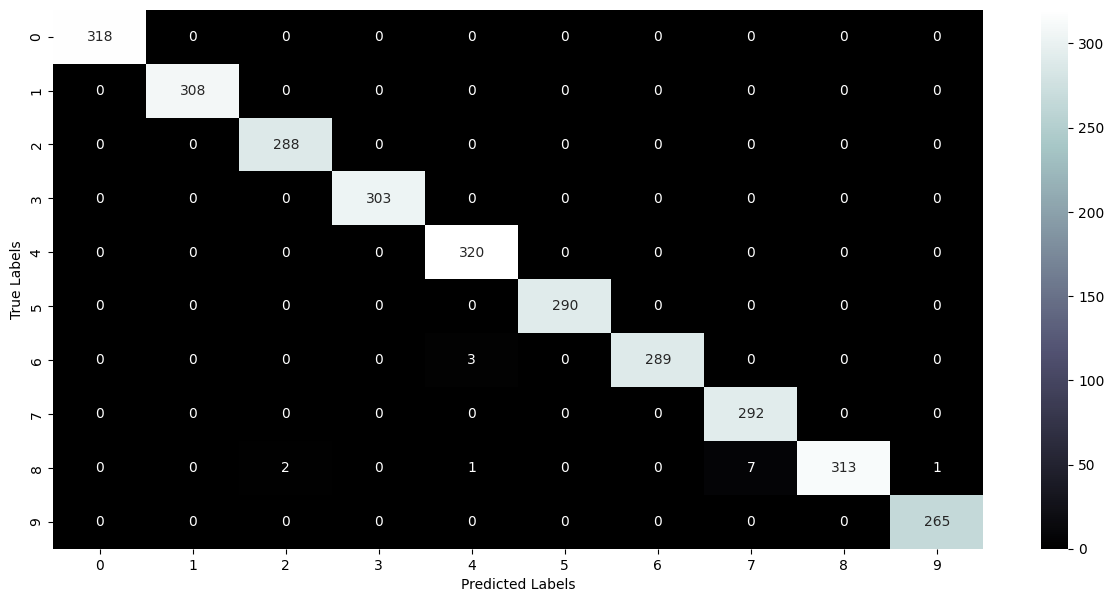

In [46]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='bone')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       308
           2       0.99      1.00      1.00       288
           3       1.00      1.00      1.00       303
           4       0.99      1.00      0.99       320
           5       1.00      1.00      1.00       290
           6       1.00      0.99      0.99       292
           7       0.98      1.00      0.99       292
           8       1.00      0.97      0.98       324
           9       1.00      1.00      1.00       265

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [64]:
model.save("model.keras")

# Load the saved model
loaded_model = tf.keras.models.load_model("model.keras")

C:\Users\hanim\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
